# Eksempel
---

Notebook med eksempel av appen.

(<matplotlib.image.AxesImage at 0x20850e9efc8>, (1000, 1000, 4))

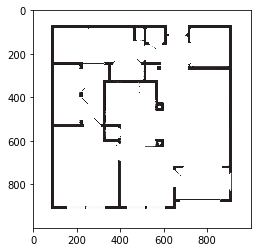

In [13]:
from web.RouterPlacer import *
# img = plt.imread("floorplans_processed/00_2.png", "gray")
img = plt.imread("floorplans_processed/01.png", "gray")
# img = plt.imread("testrom4.png", "gray")
plt.imshow(img), img.shape

Nå lager vi en instanse av routerPlacer, og henter all nødvendig informasjon.

In [ ]:
routerPlacer = RouterPlacer(img)
routerPlacer.get_optimal_solution()

Optimal coordinates not found. Getting new results
LU-decomposition not found. Getting new.
Setting up matrix.
Setting up matrix took 14.68s
Fetching LU-decomposition.
LU-decomposition took 240.31s
Got gauss-distributed points. Now checking 361 points


In [ ]:
routerPlacer.img.shape

In [ ]:
routerPlacer.score_plot()
routerPlacer.solution_plot()


***

## Sammenlikning med plassering i midten

In [ ]:
from wifi_matrix import solve_single_system, plot_single_solution
from score import step_score
from find_optimal import convolve_solution

In [ ]:
x0, y0 = routerPlacer.img.shape
x0 =(x0-1)//2
y0 = (y0-1)//2

In [ ]:
middle_solution = solve_single_system(routerPlacer.lu, x0, y0, routerPlacer.img.shape)
middle_solution = convolve_solution(middle_solution, routerPlacer.img.shape)
middle_score = step_score(middle_solution, routerPlacer.img)

In [ ]:
middle_score, routerPlacer.optimal_score

In [ ]:
plot_single_solution(middle_solution, x0, y0, routerPlacer.img)